# Salary


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Data.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    20 non-null     object 
 1   Age        16 non-null     float64
 2   Salary     18 non-null     float64
 3   Purchased  18 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [4]:
df.describe()

,Age,Salary
count,16.000000,18.000000
mean,38.500000,62388.888889
std,7.823043,11469.339634
min,27.000000,48000.000000
25%,33.750000,54000.000000
50%,37.500000,59500.000000
75%,45.000000,70750.000000
max,50.000000,83000.000000


In [5]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [6]:
a=df['Country'].unique()
print(a)

['France' 'Spain' 'Germany']


In [7]:
df.shape

(20, 4)

In [8]:
df.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,True
8,False,False,False,False
9,False,False,False,False


In [9]:
df.isnull().sum()

Country      0
Age          4
Salary       2
Purchased    2
dtype: int64

In [10]:
print("percentage null value in the data") 
df.isnull().sum()/df.shape[0]*100

percentage null value in the data


Country       0.0
Age          20.0
Salary       10.0
Purchased    10.0
dtype: float64

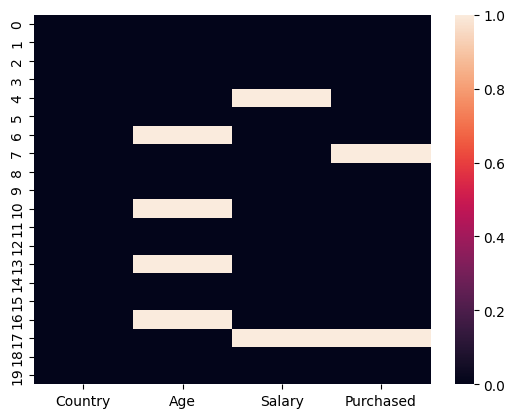

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.fillna(method='pad',inplace=True)  # Forward fill

C:\Users\HP\AppData\Local\Temp\ipykernel_6792\1811936208.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad',inplace=True)  # Forward fill


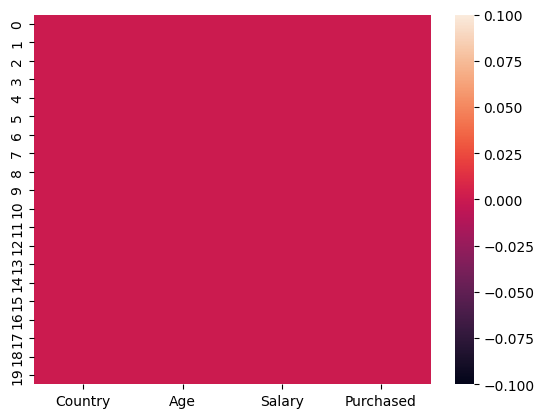

In [14]:
sns.heatmap(df.isnull())
plt.show()

In [15]:
# from sklearn.preprocessing import LabelEncoder
# cat=df.select_dtypes(include=['object']).columns
# label={}
# for col in cat:
#     le=LabelEncoder()
#     df[col]=le.fit_transform(df[col])
#     label[col]=le
    

In [16]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes


In [17]:
# from sklearn.preprocessing import OneHotEncoder
# cat=df.select_dtypes(include=['object']).columns
# encoder=OneHotEncoder(sparse_output=False)
# onehotencoded=encoder.fit_transform(df[cat])


In [18]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming 'df' is your DataFrame
# cat = df.select_dtypes(include=['object']).columns  # Select categorical columns

# # Label Encoding
# label = {}
# for col in cat:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label[col] = le

# # One-Hot Encoding
# encoder = OneHotEncoder(sparse_output=False)  # Use drop='first' to avoid multicollinearity
# encoded_columns = encoder.fit_transform(df[cat])  # Transform the categorical data
# # Output the transformed DataFrame
# print(df)


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform=ohe.fit_transform(df[['Country','Purchased']])
ohetransform

,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,1.0


In [20]:
df=pd.concat([df,ohetransform],axis=1).drop(columns=['Country','Purchased'])
df.head()

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1.0,0.0,0.0,1.0,0.0
1,27.0,48000.0,0.0,0.0,1.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0,1.0,0.0
4,40.0,61000.0,0.0,1.0,0.0,0.0,1.0


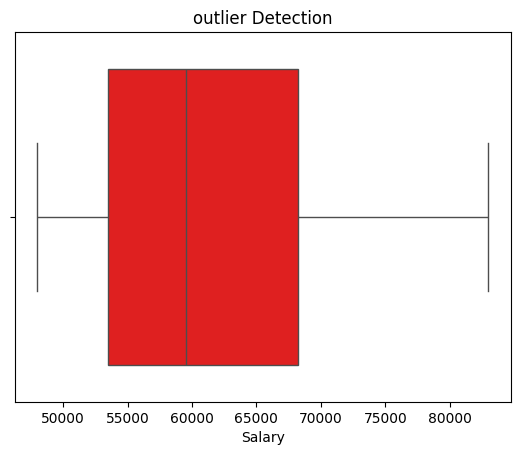

In [25]:
sns.boxplot(x='Salary',data=df,color='red')
plt.title("outlier Detection")
plt.show()


# Titanic

In [26]:
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic.shape

(891, 12)

In [32]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
titanic.drop(columns=['Cabin'],inplace=True)

In [51]:
titanic.isnull().sum()/titanic.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [ ]:
titanic.isnull().sum()/titanic.shape[0]*100